## Problem Statement
In this project, you will be required to build an image classifier using Keras. The dataset needed for this project is CIFAR 10, which is an open-source dataset.

This project aims to strengthen your fundamental understanding of convolutional neural networks. CNN help in running neural networks directly on images and are more efficient and accurate than many deep neural networks. ConvNet models are easier and faster to train on images than the other models.

## Project Description
This capstone project aims to build a classifier that can correctly classify the input images from CIFAR 10 dataset. The CIFAR-10 dataset consists of 60000, 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

**Success criteria** : **70%** test accuracy is acceptable

## Milestone 1: Downloading the Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model,to_categorical,set_random_seed
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print(f"tensorflow version {tf.__version__}")

tensorflow version 2.8.2


In [ ]:
# Set random seed for reproducibility
set_random_seed(seed=101)

In [3]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
# Given labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

## Milestone 2: Preprocessing and Data Visualisation

In [5]:
print(f"Shape of train images: {train_images.shape}")
print(f"Shape of test images: {test_images.shape}")
print(f"Size of train images: {train_images.size} bytes")
print(f"Size of test images: {test_images.size} bytes")

Shape of train images: (50000, 32, 32, 3)
Shape of test images: (10000, 32, 32, 3)
Size of train images: 153600000 bytes
Size of test images: 30720000 bytes


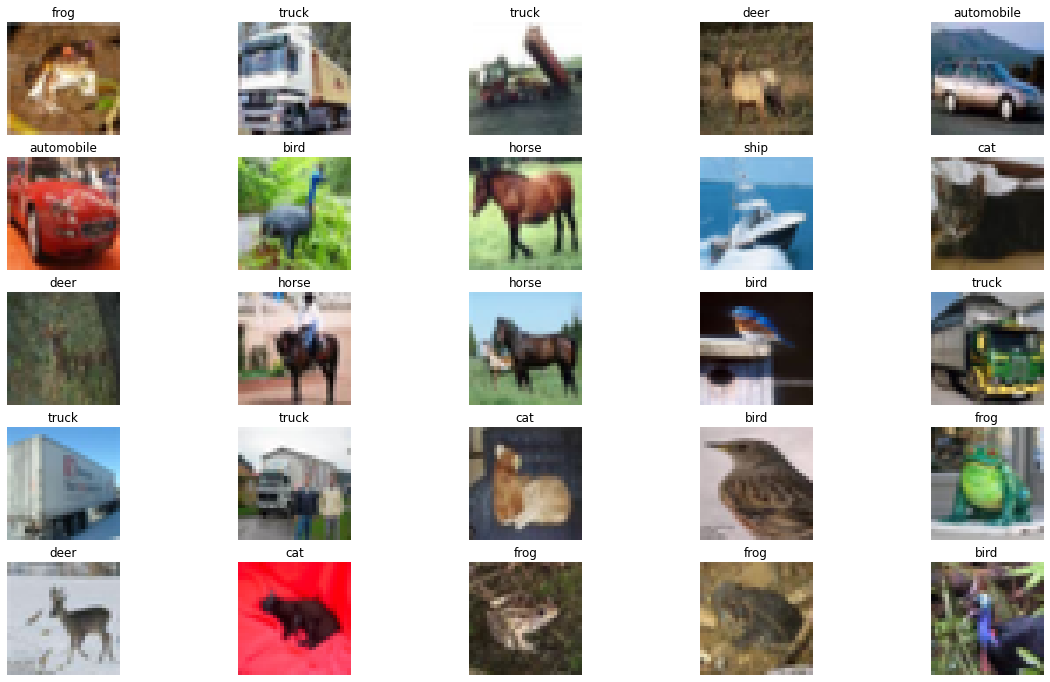

In [6]:
# Plot the first 25 images in the train dataset

plt.figure(figsize=(20,12))
for i,(image,label) in enumerate(zip(train_images[:25],train_labels[:25])):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(image)
  plt.title(class_names[label[0]])
  plt.axis('off')

In [7]:
# Normalization of images
train_images = train_images/255.0
test_images = test_images/255.0

In [8]:
# Convert labels to one-hot encoding using to_categorical
train_labels = to_categorical(train_labels,num_classes=10)
test_labels = to_categorical(test_labels,num_classes=10)

## Milestone 3: Model Building

In [11]:
# Create the model
model = Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3),name='conv_layer_1'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',name='conv_layer_2'))
model.add(layers.MaxPool2D(name='MaxPool_1'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',name='conv_layer_3'))
model.add(layers.MaxPool2D(name='MaxPool_2'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 32, 32, 32)        896       
                                                                 
 conv_layer_2 (Conv2D)       (None, 32, 32, 32)        9248      
                                                                 
 MaxPool_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 16, 16, 32)        9248      
                                                                 
 MaxPool_2 (MaxPooling2D)    (None, 8, 8, 32)          0         
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Add the flatten and fully connected layer 
model.add(layers.Flatten(name='Flatten'))
model.add(layers.Dense(units=100,activation='relu',name='Dense_1'))
model.add(layers.Dense(units=10,activation='softmax',name='Dense_2'))

# Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 32, 32, 32)        896       
                                                                 
 conv_layer_2 (Conv2D)       (None, 32, 32, 32)        9248      
                                                                 
 MaxPool_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 16, 16, 32)        9248      
                                                                 
 MaxPool_2 (MaxPooling2D)    (None, 8, 8, 32)          0         
                                                                 
 Flatten (Flatten)           (None, 2048)              0         
                                                                 
 Dense_1 (Dense)             (None, 100)               2

## Milestone 4:  Understand Your Model

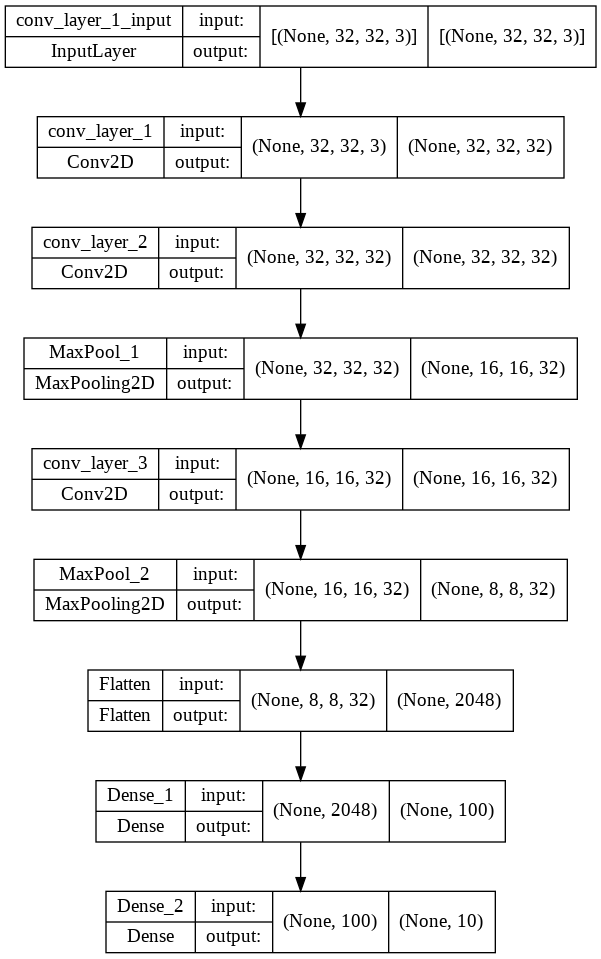

In [14]:
# Plot the model architecture
plot_model(model=model,show_shapes=True)

## Milestone 4:  Compile, Evaluate and Save Your Model

In [15]:
# Compile the model
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [16]:
# Train the model
history = model.fit(x=train_images,y=train_labels,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 10s 5ms/step - loss: 1.3772 - accuracy: 0.5063 - val_loss: 1.0831 - val_accuracy: 0.6166
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9628 - accuracy: 0.6608 - val_loss: 0.8894 - val_accuracy: 0.6930
Epoch 3/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.8097 - accuracy: 0.7178 - val_loss: 0.8306 - val_accuracy: 0.7208
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7033 - accuracy: 0.7551 - val_loss: 0.8952 - val_accuracy: 0.6894
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6152 - accuracy: 0.7843 - val_loss: 0.8092 - val_accuracy: 0.7316
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5401 - accuracy: 0.8112 - val_loss: 0.8464 - val_accuracy: 0.7248
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4629 - accuracy: 0.8360 - val_loss: 0.8389 - val_accuracy

In [17]:
# Evaluate the model on test data
_,test_accuracy = model.evaluate(x=test_images,y=test_labels)
print(f"Accuracy on test data is {round(test_accuracy,4)}")

313/313 [==============================] - 1s 3ms/step - loss: 1.1121 - accuracy: 0.7115
Accuracy on test data is 0.7115


In [18]:
# Save the model in .h5 format
model.save('model_iteration_1.h5')

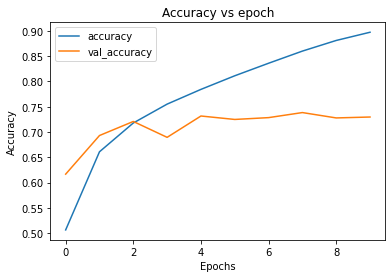

In [19]:
# Plot the training and validation accuracy curves
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(title='Accuracy vs epoch',xlabel='Epochs',ylabel='Accuracy')

In [20]:
training_accuracy = round(history.history['accuracy'][-1],4)
validation_accuracy = round(history.history['val_accuracy'][-1],4)
print(f"training_accuracy {training_accuracy}")
print(f"validation_accuracy {validation_accuracy}")

training_accuracy 0.8973
validation_accuracy 0.7296


## Milestone 5:  Load the Saved Model and Make a Prediction

In [21]:
# Load the saved model
saved_model = tf.keras.models.load_model('model_iteration_1.h5')

In [22]:
# Read the image from disk and convert to array
test_image_1 = tf.keras.utils.load_img('test_image_1.png',target_size=(32,32))
test_image_2 = tf.keras.utils.load_img('test_image_2.png',target_size=(32,32))
test_image_1_array = tf.keras.utils.img_to_array(test_image_1)
test_image_1_array = np.array([test_image_1_array])
test_image_2_array = tf.keras.utils.img_to_array(test_image_2)
test_image_2_array = np.array([test_image_2_array])

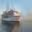

In [23]:
test_image_1

In [24]:
class_names[np.argmax(saved_model.predict(test_image_1_array))]

'ship'

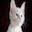

In [25]:
test_image_2

In [26]:
class_names[np.argmax(saved_model.predict(test_image_2_array))]

'cat'

Both the images are correctly predicted.